In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [4]:
# lista nazw plików
files = ["AOS_data.csv"]# "AMT_data.csv", "AMZN_data.csv", "ANDV_data.csv", "ANSS_data.csv", "ANTM_data.csv", "AON_data.csv", "AOS_data.csv", "APA_data.csv", "APC_data.csv", "APD_data.csv", "APH_data.csv", "APTV_data.csv", "ARE_data.csv", "ARNC_data.csv", "ATVI_data.csv", "AVB_data.csv", "AVGO_data.csv", "AVY_data.csv", "AWK_data.csv", "AXP_data.csv", "AYI_data.csv", "AZO_data.csv", "A_data.csv", "ADP_data.csv", "ADSK_data.csv", "ADS_data.csv", "AEE_data.csv", "AEP_data.csv", "AES_data.csv", "AET_data.csv", "AFL_data.csv", "AGN_data.csv", "AIG_data.csv", "AIV_data.csv", "AIZ_data.csv", "AJG_data.csv", "AKAM_data.csv", "ALB_data.csv", "ALGN_data.csv", "ALK_data.csv", "ALLE_data.csv", "ALL_data.csv", "ALXN_data.csv", "AMAT_data.csv", "AMD_data.csv", "AME_data.csv", "AMGN_data.csv", "AMG_data.csv", "AAL_data.csv", "AAPL_data.csv", "AAP_data.csv", "ABBV_data.csv", "ABC_data.csv", "ABT_data.csv", "ACN_data.csv", "ADBE_data.csv", "ADI_data.csv", "ADM_data.csv"]

K = 100
Procent = K/1259*100
print("Procent przewidywanych próbek: %.2f" % (Procent))

# pętla przez wszystkie pliki
for file in files:
    print("File:", file)
    
    # wczytanie danych
    dt = pd.read_csv(file)
    dt = dt.drop(columns=['date', 'Name'])
    
    # dodanie kolumny prediction
    dt['prediction'] = dt[['open']].shift(-K)
    
    # wejściowe dane
    X = np.array(dt.drop(['prediction'], 1))
    X = preprocessing.scale(X)
    X_dni = X[-K:]
    X = X[:-K]
    
    # wyjściowe dane
    y = np.array(dt['prediction'])
    y = y[:-K]
    
    # podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # model
    mlp = MLPRegressor(random_state=1, max_iter=500)
    
    # wyszukiwanie najlepszych parametrów
    parametry = {
    'learning_rate_init': [0.1, 0.01, 0.001], 
    'hidden_layer_sizes': [20, 40, 60, 80, 100], 
    'solver': ['adam', 'lbfgs', 'sgd'], 
    'learning_rate': ['constant', 'adaptive']
    }
    clf = GridSearchCV(mlp, parametry)
    clf.fit(X_train, y_train)
    print("Best params: ", clf.best_params_)
    mlp.fit(X_train, y_train)

    # dokładność modelu
    print("Dokladność (train): ", mlp.score(X_train, y_train)*100, '%')
    print("Dokladność (test): ", mlp.score(X_test, y_test)*100, '%')

    

    # Dokonaj predykcji na kolejnych K wierszach
    prediction_dni = mlp.predict(X_dni)
    print("Predykcje dla kolejnych K wierszy: ", prediction_dni)

Procent przewidywanych próbek: 7.94
File: AOS_data.csv
Best params:  {'hidden_layer_sizes': 60, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Dokladność (train):  93.4845789055662 %
Dokladność (test):  92.88733706434923 %
Maksymalny błąd (train):  2.73738174137038
Maksymalny błąd (test):  2.7367840169564586
Predykcje dla kolejnych K wierszy:  [65.02172653 65.78348504 65.88153414 66.27922092 66.84032988 67.01460377
 66.98741317 66.88602605 66.74722563 66.68160806 66.81927782 67.74794276
 68.19058693 69.27981501 69.40479823 69.70142269 69.41735713 69.40273588
 69.34073819 69.94765961 70.31997551 70.24012866 69.71187266 69.51999469
 69.14867474 70.38630882 70.71413937 70.28656886 66.90469378 66.95633695
 67.15159293 66.80989118 66.75719085 67.35251815 67.45838905 67.8686016
 67.39051514 67.36407173 67.27017557 66.36149311 65.95328837 66.24933002
 66.42144718 65.98416265 66.39820988 66.5610237  67.09438174 67.60436507
 68.87437344 69.51633256 69.0409329  70.6032

In [18]:
max_error = np.max((np.abs(y[-K:] - prediction_dni)-prediction_dni[0]+y[1060]))
print("Ogólny minimalny błąd: ", max_error)


Ogólny maksymalny błąd:  6.575715911243066


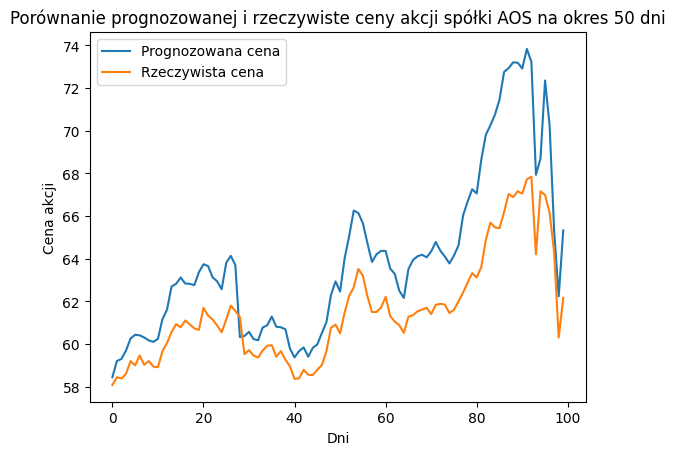

In [16]:
# rysowanie wykresu prognozowanej ceny akcji
plt.plot(prediction_dni-prediction_dni[0]+y[1060], label='Prognozowana cena')

# rysowanie wykresu rzeczywistej ceny akcji
plt.plot(np.array(dt['open'])[-K:], label='Rzeczywista cena')

# dodanie opisu osi x
plt.xlabel('Dni')

# dodanie opisu osi y
plt.ylabel('Cena akcji')

# dodanie tytułu wykresu
plt.title('Porównanie prognozowanej i rzeczywiste ceny akcji spółki AOS na okres 100 dni')

# dodanie legendy
plt.legend()

# wyświetlenie wykresu
plt.show()